In [3]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('sentiwordnet')
from nltk import sent_tokenize, pos_tag
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.util import mark_negation
from string import punctuation
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Настюша\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\Настюша\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


Оценка тональности с помощью SentiWorldNet

In [5]:
# преобразуем теги из формата Penn Treebank в WordNet
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [8]:
# оценка тональности текста с использованием оценок тональности SentiWordNet
def get_sentiment_score(text):
    total_score = 0
    raw_sentences = sent_tokenize(text)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        #print(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        tags = pos_tag(tokens)
        for word, tag in tags:
            wn_tag = penn_to_wn(tag)
            if not wn_tag:
                continue
            lemma = WordNetLemmatizer().lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sent_score += swn_synset.pos_score() - swn_synset.neg_score()

        total_score = total_score + (sent_score / len(tokens))

    
    return (total_score / len(raw_sentences)) * 100

In [10]:
reviews = pd.read_csv("C:/Users/Настюша/Jupyter/Sentiment_Analysis/small_corpus.csv")

In [12]:
reviews.shape

(4500, 12)

In [14]:
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,False,"03 8, 2009",A1I2KO0NIKPC09,B0018YXM3Y,C. Barnes,"While some people can run this game, a great many people are experiencing game crashing bugs, lockups, graphical glitches, and dozens of other problems.\r\n\r\nMaybe there is a good game somewhere underneath and past all the bugs that the game has. Right now this game is an alpha, not even a beta -- its that bad.\r\n\r\n[...]",An unfinished game,1236470400,6.0,"{'Edition:': ' Standard', 'Platform:': ' PC'}",NaN
1,1.0,True,"06 9, 2015",AGFTDU77CILMS,B00JTQS1DO,odaine,no good already stopped working weeks ago they are no good,One Star,1433808000,NaN,NaN,NaN
2,1.0,True,"06 5, 2011",A2NJ7UA3NPQK2E,B001E2OW1Q,Matthew A. Roberts,"I have been lusting over this product since I had heard about it. I started playing Rock Band drums when the second one came out and my wife got burnt out on them. There were several issues with the Rock Band 2 drums that made me desire this product. The pads eventually started bubbling up (red and yellow at first) and the pedals broke all the time. I have a Rock Band 2 set that is covered in duct tape and it still performs decently. When Rock Band 3 came out, that was it. I had to have this product. I recently graduated from college and my wife told me i could get whatever I wanted. After a month of thinking, I decided on this product. First of all, Amazon shipping is super fast. I got my product very quickly. As soon as this thing came in the mail, I had ripped open the box only to find many smaller boxes inside. My wife and I took out all the smaller boxes and examined all the components. I was super excited to see that all the parts looked like they were high quality. This set is massive, as mentioned in the other reviews. Also, it is very heavy and does take about 45 minutes to an hour to set up. After that, you will spend a great deal of time adjusting until you can hit the actual pads/cymbals and not completely miss and throw your drumsticks across the room. Let me just say that, for a few days, this kit was AMAZING. It was really the most fun I had ever had with Rock Band. I felt like I was playing real drums! I would wake up early just to play with this kit. The problems started a few days in. My wife had went to work and I had the entire day to spend with this kit. After about 1 hour of playing, I noticed that I was missing notes that I shouldn't have been missing. After some testing, I realized that the red pad would trigger all by itself...for seeming no reason. I noticed that there was a LOT of static buildup on the pads. They felt like a CRT TV when you put your hand up to it. Once I noticed this, the ION brain had taken some minor damage from the static traveling to it and it started to perform poorly. The whole issue with this kit (after researching) is that the pedal is made of solid metal and is connected directly to the brain. The kit is NOT properly shielded from electricity. I contacted amazon and they overnighted me a new kit. I was greatly disappointed with my toy at this time but hoped that it was a fluke. I saw so many videos on the internet of people playing this on carpet with seeming no problems. I did not understand why I could not do the same. I will say that it took me forever to package this thing back up. It really felt like I was playing Tetris trying to get all this stuff back in the box. Also, there was a slight sting I felt from wanting this product for so long and then immediately being disappointed by it. Once the new one came, I took my time noting the position of all the boxes. I did not want to have the same problem packaging it back up. After putting the new one together. It had even more problems. The cymbals were double hitting and the red AND yellow pad would trigger for no reason. At this point, I sent both of them back and got a refund. Thank you Amazon for being so awesome. I am very happy t

In [16]:
reviews.dropna(subset=['reviewText'], inplace=True)

In [18]:
reviews.shape

(4499, 12)

In [20]:
reviews['swn_score'] = reviews['reviewText'].apply(lambda text : get_sentiment_score(text))

In [21]:
reviews[['reviewText','swn_score']].sample(2)

,reviewText,swn_score
2170,"I had read reviews of this online before purchasing and the reviews were ""average"". I knew I was still going to buy it even knowing there were ""camera issues"" among other problems. I was just too big a Looney Tunes fan to pass it up. However, after playing it, I must confess that if I knew then what I know now, I would not have purchased it even at $39.99. The problem is not necessarily the camera (although there are definite issues there) but it is what I perceive as outright bugs. Example: In the second mission of the second level (Escape from Camelot), I got to a point where I had killed a robot on a platform but didn't make the jump to the next platform in time. Killing the robot triggers the platform to move. No big deal? Well, if you restart from the checkpoint, the robot is no longer there so nothing triggers the platform to move. My only option is to restart the entire mission. This also happened on level 1. Normally, I would not review something without at least being halfway through but I thought people should be aware of this. Overall, I still rank it average since it is a fun game, reasonably priced, etc. Certainly not one of the best games out there out. Spend wisely.",-0.404858
418,worst call of duty evera Call of Duty fan but this has to be the worst Call of Duty game ever made the guns are not balanced stopping power of perks it's full of hackers and cheaters this don't even deserve one star I do not Recommend game anyone save your money or go spending on other game,-2.500000


In [22]:
reviews[['reviewText','swn_score']].sample(2)

,reviewText,swn_score
3386,"Yes, for some reason they added popular stuff like bullet time, running on walls, and dodging bullets, which, with maybe the exception of dodging bullets (spider sense), seems to be just thrown in there. However, I like this game, because it really has the feeling of being a superhero, with the minor and major crimes to be stopped. Late in the game, though, the thugs suddenly start being able to block and dodge really well, which is annoying. They also got the GTA feeling (except you're a crimefighter instead of a criminal) with hidden tokens and extra missions like delivering pizza. It's fun to try and get everything, and just swinging and web-zipping is cool. The dialogue can also be good (Mysterio: ""I am Mysterio!"" Spidey: ""Hmm, didn't I have Mysterios for breakfast?"").",2.424242
3954,"Wii Play is a very inexpensive game that helps with casual play. It is a good match for Wii sports. The games are fun, the shooting game is decent as part of a small collection. I don't really think it can be beat for the price.",3.826531


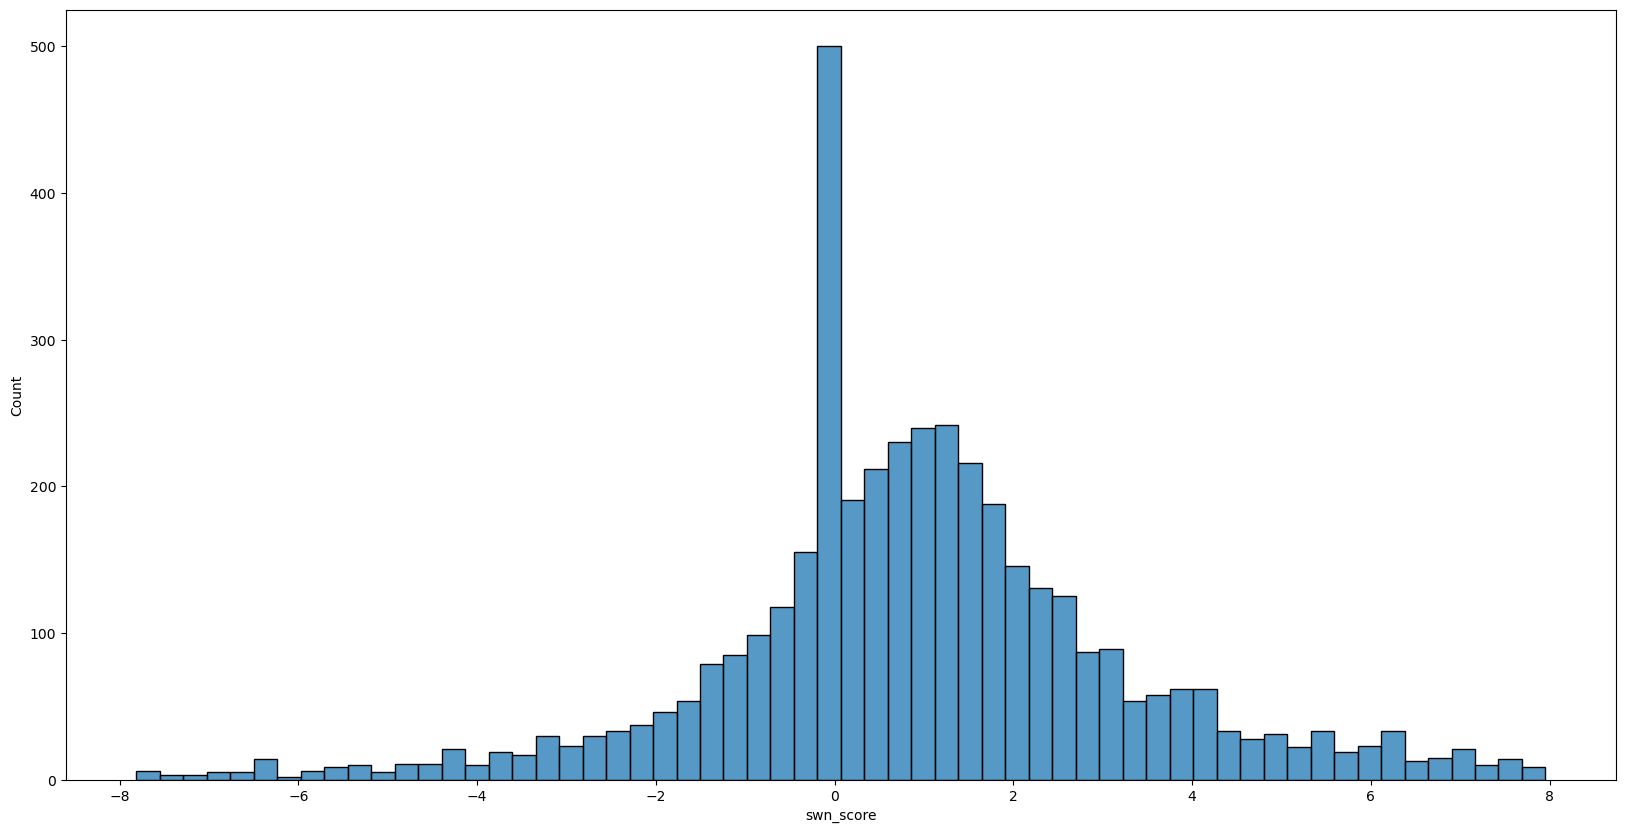

In [23]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='swn_score', data=reviews.query("swn_score < 8 and swn_score > -8"), ax=ax)
plt.show()

In [24]:
reviews['swn_sentiment'] = reviews['swn_score'].apply(lambda x: "positive" if x>1 else ("negative" if x<0.5 else "neutral"))

In [25]:
reviews['swn_sentiment'].value_counts(dropna=False)

swn_sentiment
positive    2208
negative    1838
neutral      453
Name: count, dtype: int64

<Axes: xlabel='overall', ylabel='count'>

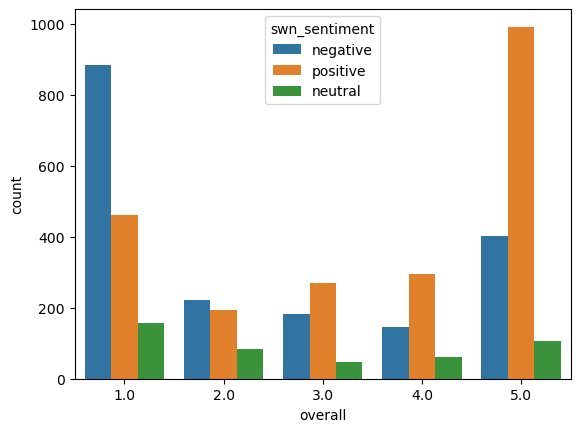

In [26]:
sns.countplot(x='overall', hue='swn_sentiment', data = reviews)

<Axes: xlabel='swn_sentiment', ylabel='overall'>

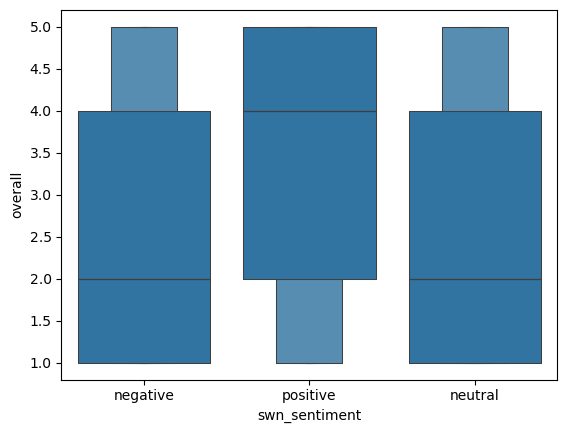

In [27]:
sns.boxenplot(x='swn_sentiment', y='overall', data = reviews)

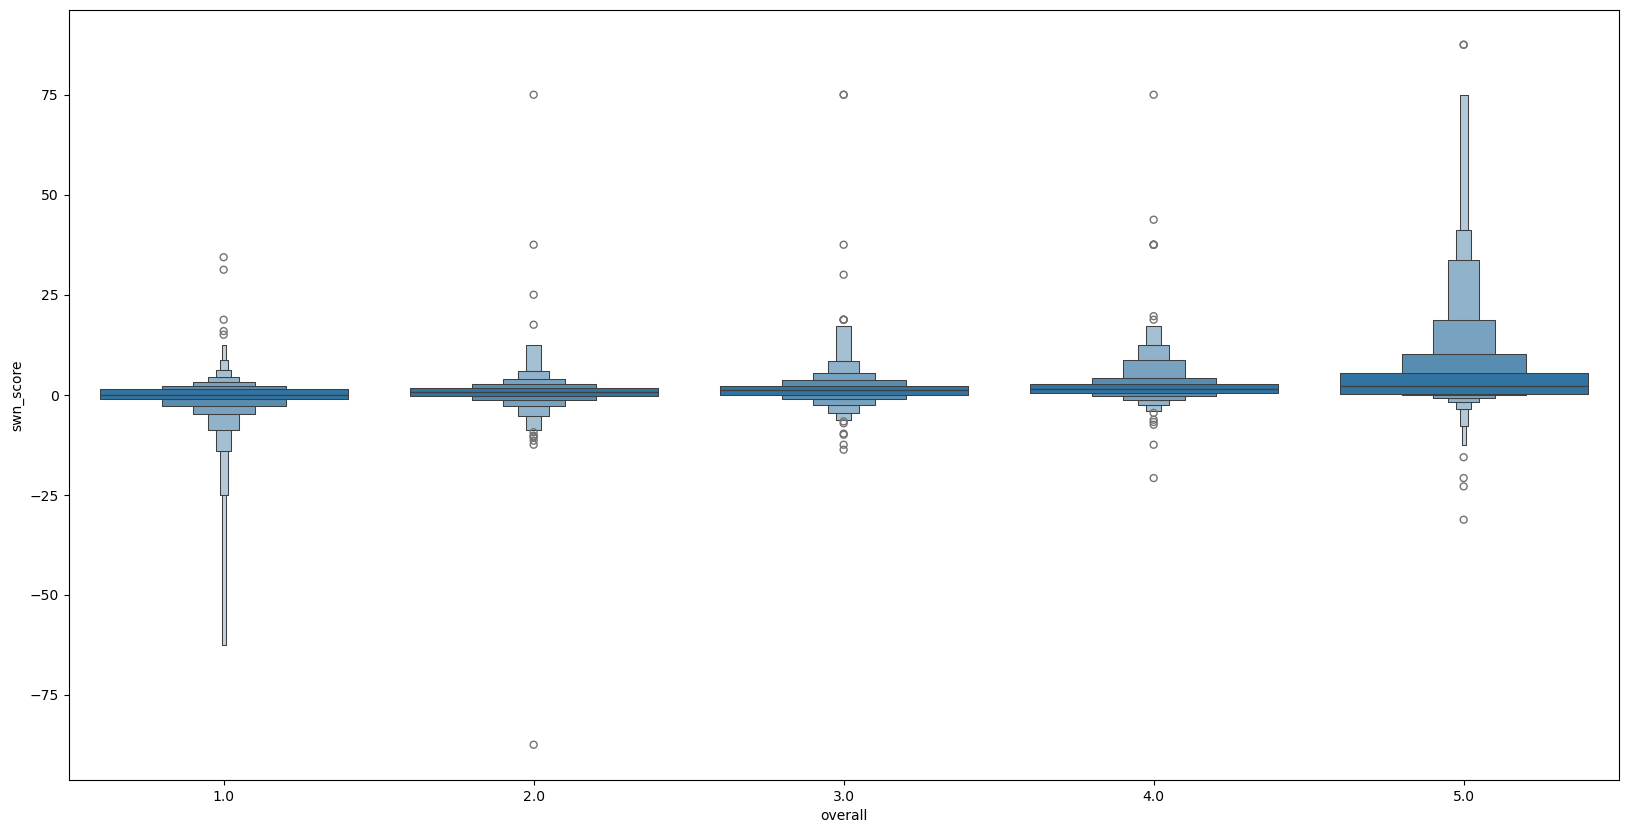

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (20,10))
sns.boxenplot(x = 'overall', y = 'swn_score', data = reviews, ax=ax)
plt.show()

In [29]:
reviews['true_sentiment'] = \
    reviews['overall'].apply(lambda x: "positive" if x>=4 else ("neutral" if x==3 else "negative"))

In [30]:
y_swn_pred, y_true = reviews['swn_sentiment'].tolist(), reviews['true_sentiment'].tolist()

In [31]:
len(y_swn_pred), len(y_true)

(4499, 4499)

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_swn_pred)

Text(109.7222222222223, 0.5, 'True')

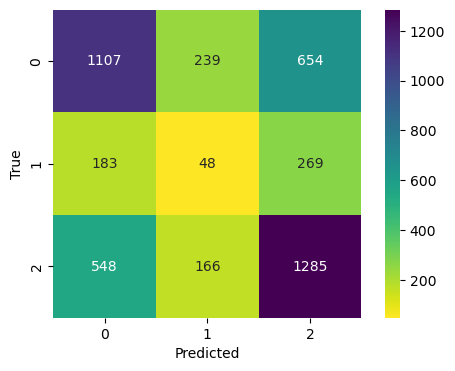

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

Оценка прогнозирования негативных меток

In [35]:
tp, tn, fp, fn = 1107, 48+269+166+1285, 239+654, 183+548

In [36]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp / (tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

In [37]:
print("recall: {}\nprecission: {}\nspecifity: {}\nf1 score: {}".format(recall, precision, specifity, f1))

recall: 0.6022850924918389
precission: 0.5535
specifity: 0.6644118752348741
f1 score: 0.57686294945284


Оценка прогнозирования позитивных меток

In [39]:
tp, tn, fp, fn = 1285, 1107+239+183+48, 269+654, 166+548

In [40]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp / (tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

In [41]:
print("recall: {}\nprecission: {}\nspecifity: {}\nf1 score: {}".format(recall, precision, specifity, f1))

recall: 0.6428214107053527
precission: 0.5819746376811594
specifity: 0.6308
f1 score: 0.6108866175421915


Модель оценки отзывов с использованием NLTK Opinion Lexicon

In [43]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize, sent_tokenize

In [44]:
nltk.download("opinion_lexicon")

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\Настюша\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [45]:
pos_words = list(opinion_lexicon.positive())
neg_words = list(opinion_lexicon.negative())

In [46]:
# оценка тональности (сентимент-анализа) текста
def get_sentiment_score_oplex(text):
    total_score = 0
    raw_sentences = sent_tokenize(text)
    for sentence in raw_sentences:
        sent_score = 0     
        sentence = str(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        for token in tokens:
            sent_score = sent_score + 1 if token in pos_words else (sent_score - 1 if token in neg_words else sent_score)
        total_score = total_score + (sent_score / len(tokens))

    return total_score
    

In [47]:
reviews['oplex_sentiment_score'] = reviews['reviewText'].apply(lambda x: get_sentiment_score_oplex(x))

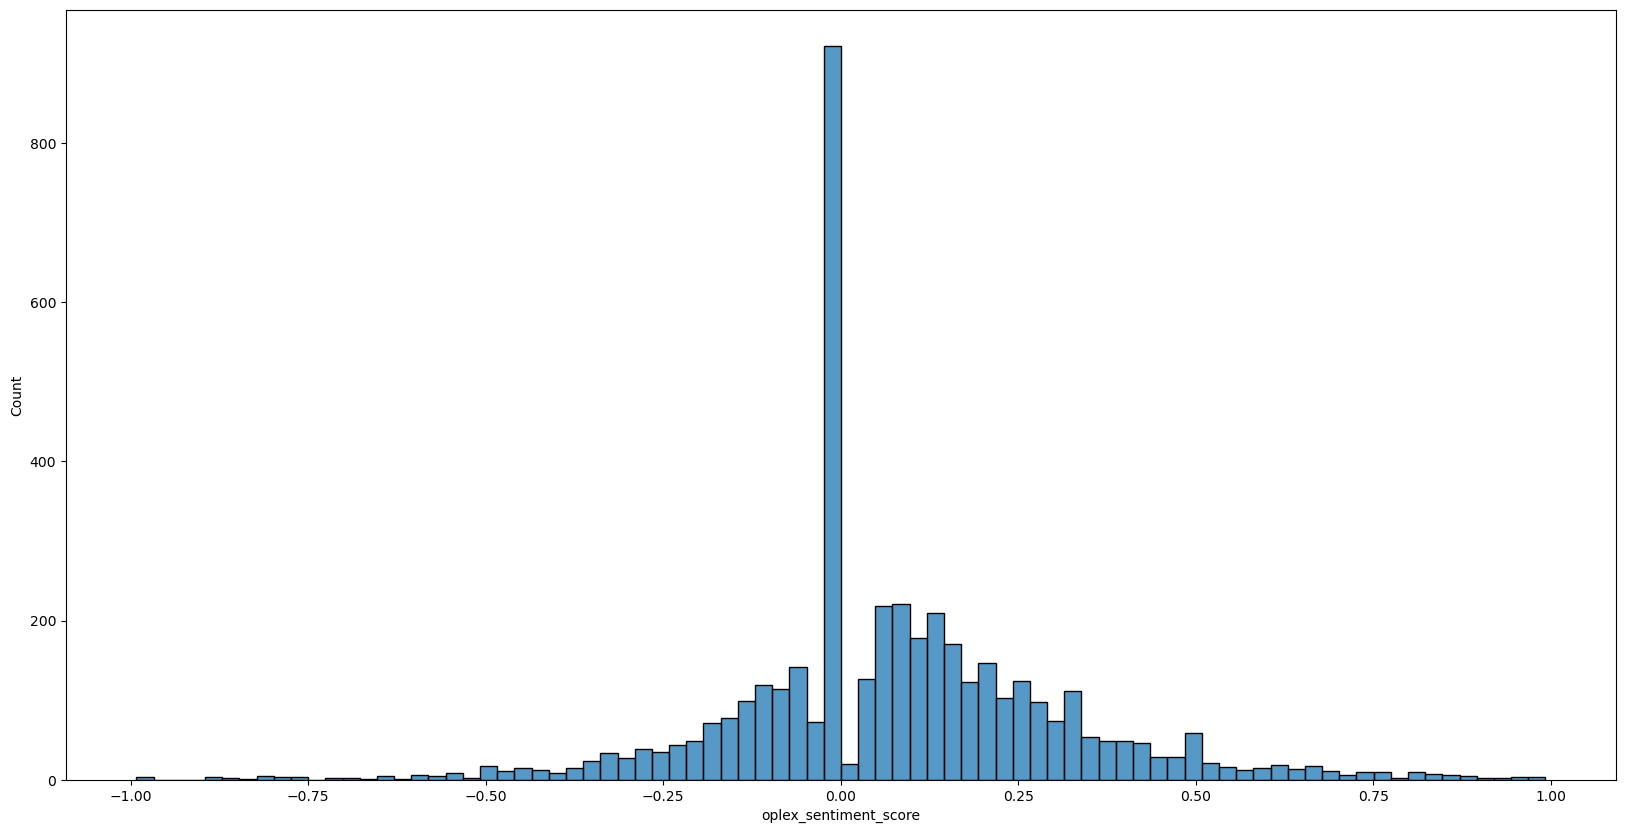

In [48]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='oplex_sentiment_score',\
             data=reviews.query("oplex_sentiment_score < 1 and oplex_sentiment_score>-1"), ax=ax)
plt.show()

In [49]:
reviews['oplex_sentiment'] = \
    reviews['oplex_sentiment_score'].apply(lambda x: "positive" if x>0.1 else("negative" if x<0 else "neutral"))

In [50]:
reviews['oplex_sentiment'].value_counts(dropna=False)

oplex_sentiment
positive    1881
neutral     1528
negative    1090
Name: count, dtype: int64

<Axes: xlabel='overall', ylabel='count'>

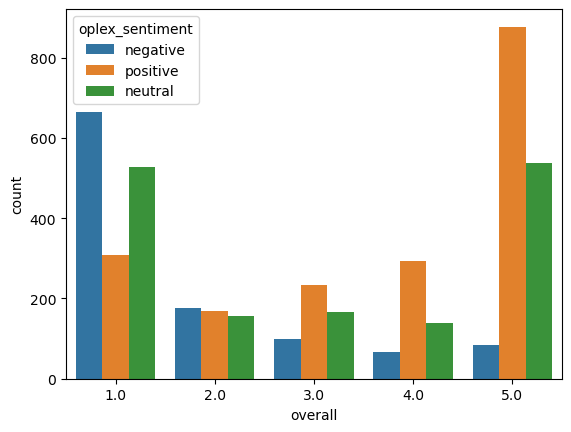

In [51]:
sns.countplot(x='overall', hue='oplex_sentiment', data = reviews)

<Axes: xlabel='oplex_sentiment', ylabel='overall'>

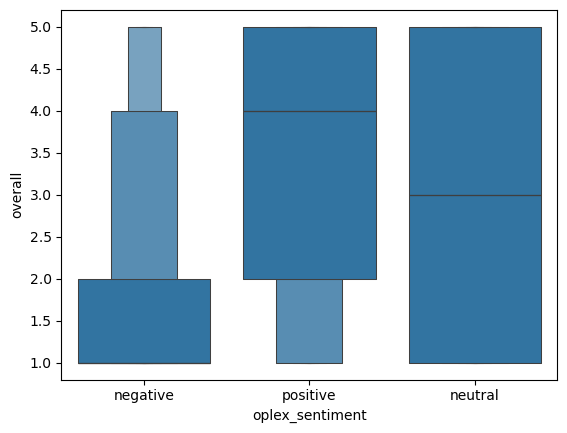

In [52]:
sns.boxenplot(x='oplex_sentiment', y='overall', data = reviews)

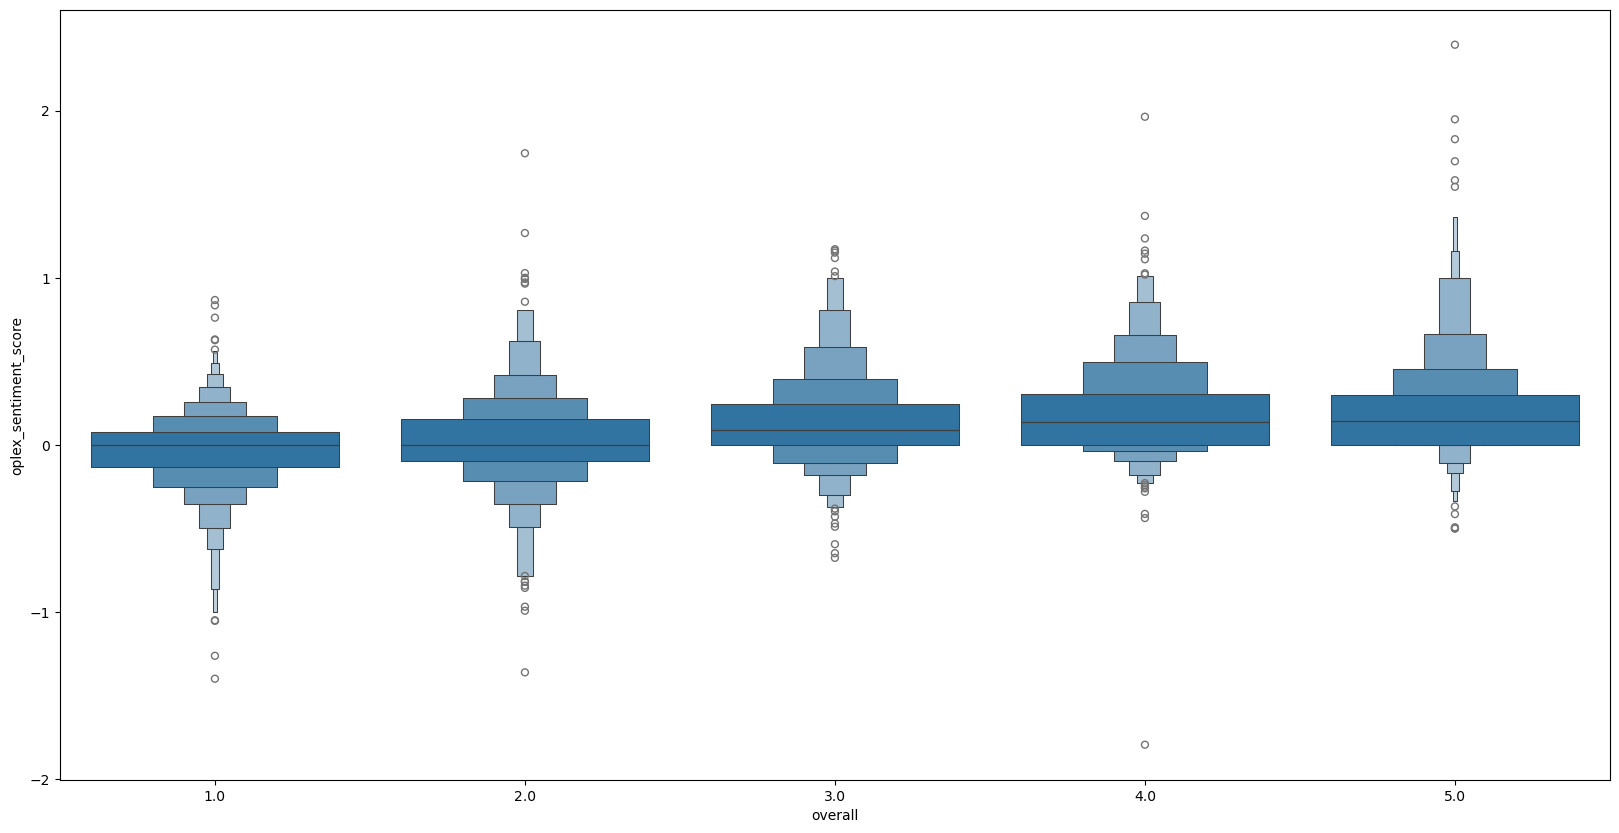

In [53]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(20,10))
sns.boxenplot(x='overall', y='oplex_sentiment_score', data = reviews, ax=ax)
plt.show()

In [85]:
y_oplex_pred = reviews['oplex_sentiment'].tolist()

In [87]:
from sklearn.metrics import confusion_matrix

In [89]:
oplex_cm = confusion_matrix(y_true, y_oplex_pred)

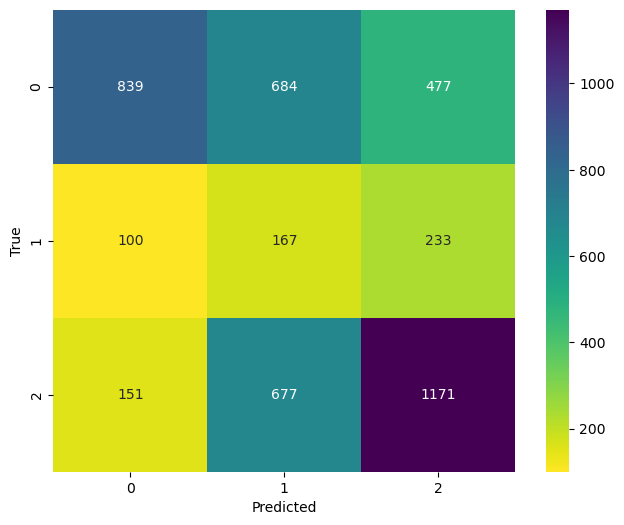

In [93]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(oplex_cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');


In [95]:
open_cm = list(oplex_cm.ravel())
oplex_cm

array([[ 839,  684,  477],
       [ 100,  167,  233],
       [ 151,  677, 1171]], dtype=int64)

Оценка отрицательных меток

In [97]:
tp, tn, fp, fn = 839, 167+233+677+1171, 100+151, 684+477

In [99]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nspecifity: {}\nprecission: {}\nf1 score: {}".format(recall, specifity, precision, f1))

recall: 0.4195
specifity: 0.8995598239295718
precission: 0.7697247706422018
f1 score: 0.543042071197411


Оценка положительных меток


In [103]:
tp, tn, fp, fn = 1171, 839+684+100+167, 477+233, 151+677

In [105]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nspecifity: {}\nprecission: {}\nf1 score: {}".format(recall, specifity, precision, f1))

recall: 0.5857928964482241
specifity: 0.716
precission: 0.62254120148857
f1 score: 0.6036082474226804
